In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(r"/content/Trump_Rallies_Dataset.csv")

In [ ]:
df.head()

,Unnamed: 0,Place,Date,Transcript
0,0,Speech: Donald Trump Holds a Campaign Rally in...,October 12 2020,"Hello, everybody. Hello, Orlando. Hello, Sanfo..."
1,1,Speech: Donald Trump Holds a Campaign Rally in...,September 30 2020,"Hello, everybody. Hello, Duluth. Hello, Duluth..."
2,2,Speech: Donald Trump Holds a Campaign Rally in...,September 26 2020,"Oh, thank you. Well, we won Pennsylvania last ..."
3,3,Speech: Donald Trump Holds a Campaign Rally in...,September 25 2020,"Thank you very much. Hello, Newport News. I kn..."
4,4,Speech: Donald Trump Holds a Campaign Rally in...,September 24 2020,[This is a machine transcript written automati...


In [ ]:
df.shape

(103, 4)

In [ ]:
transcript_92 = df.loc[92, 'Transcript']

# Display the isolated transcript
print("Transcript 92:")
print(transcript_92)

Transcript 92:
Thank you. Thank you. [Applause, Crowd chants USA] Thank you, everybody. Thank you. And if you think this crowd is big, you should see right now what's outside. Congratulations. [Applause] Hello, Pensacola. What a place. Right here on the Emerald Coast, right? The Emerald Coast in the great state of Florida where we had a tremendous victory, didn't we? Come on. [Applause] We are joined by many, many people in the military and great American patriots. Thank you very much. [Applause] When you remember the campaign, I said, let me begin by wishing each and every one of you a very Merry Christmas. Right? [Applause] And I can think of no better Christmas present for the American people than giving you a massive tax cut. That is what's happening. [Applause] And your Senate and your House hopefully very shorty will have those approvals. Those heads will go up and you will be paying a lot less tax. So, congratulations. I hope. They got to vote and I think they will. I can't wait

In [ ]:
import pandas as pd
import spacy
from collections import Counter

# Load SpaCy's English model
nlp = spacy.load("en_core_web_sm")

# Assuming 'df' is your dataframe and 'Transcript' contains the text
texts = df['Transcript'].dropna().tolist()

# Extract only PERSON entities
person_entities = []
for text in texts:
    doc = nlp(text)
    person_entities.extend([ent.text for ent in doc.ents if ent.label_ == "PERSON"])

# Count the frequency of PERSON entities
person_entity_counts = Counter(person_entities)

# Remove unwanted entities (e.g., "Audience Boos")
exclude_entities = {"Audience Boos", "Audience Boos]"}
filtered_person_entity_counts = {k: v for k, v in person_entity_counts.items() if k not in exclude_entities}

# Convert to a dataframe for better viewing
person_entity_df = pd.DataFrame(filtered_person_entity_counts.items(), columns=["Entity", "Frequency"])
person_entity_df = person_entity_df.sort_values(by="Frequency", ascending=False)

# Display the top 20 PERSON entities
top_20_person_entities = person_entity_df.head(20)
print(top_20_person_entities)



              Entity  Frequency
3              Biden        340
54             Trump        309
1                Joe        283
14      Donald Trump        253
49             Obama        195
2          Joe Biden        193
26            Bernie        163
37              Mike        154
68      Nancy Pelosi        139
9            Hillary        123
125              God        114
324            David         95
107              Jim         92
161  Hillary Clinton         81
29               Ron         79
28            Hunter         78
35              John         76
544  Brett Kavanaugh         72
246    Chuck Schumer         70
33              Matt         68


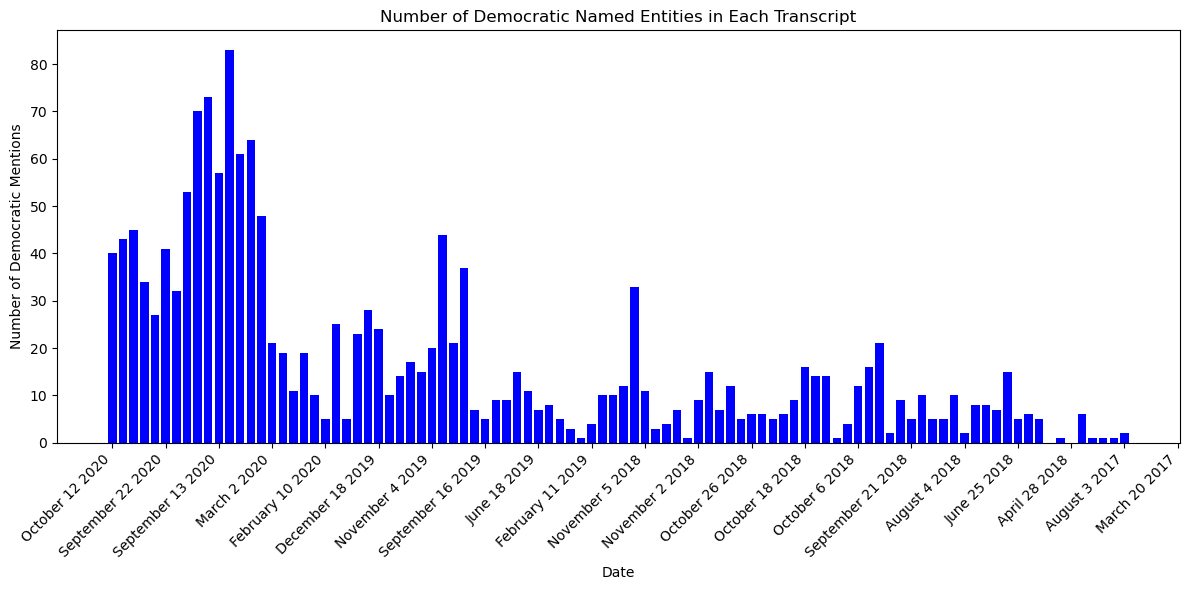

In [ ]:
# List of Democratic party names (can be expanded)
democratic_names = {
    "Biden", "Joe", "Joe Biden", "Obama", "Bernie", "Hillary",
    "Nancy Pelosi", "Hillary Clinton", "Hunter", "Chuck Schumer"
}

# Count Democratic mentions per transcript
democratic_counts = []
for text in texts:
    # Tokenize each transcript and count Democratic mentions
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
    democratic_count = sum(1 for entity in entities if entity in democratic_names)
    democratic_counts.append(democratic_count)

# Step 5: Create a DataFrame for Democratic mentions
mentions_df = pd.DataFrame({"Date": dates, "Democratic Mentions": democratic_counts})

import matplotlib.pyplot as plt

# Step 6: Plot the number of Democratic mentions with improved x-axis formatting
plt.figure(figsize=(12, 6))
plt.bar(mentions_df['Date'], mentions_df['Democratic Mentions'], color='blue')
plt.xlabel("Date")
plt.ylabel("Number of Democratic Mentions")
plt.title("Number of Democratic Named Entities in Each Transcript")

# Adjust the x-axis ticks to show only every nth date
n = 5  # Show every 5th date (adjust as needed)
plt.xticks(ticks=range(0, len(mentions_df['Date']), n), labels=mentions_df['Date'][::n], rotation=45, ha='right')

plt.tight_layout()
plt.show()



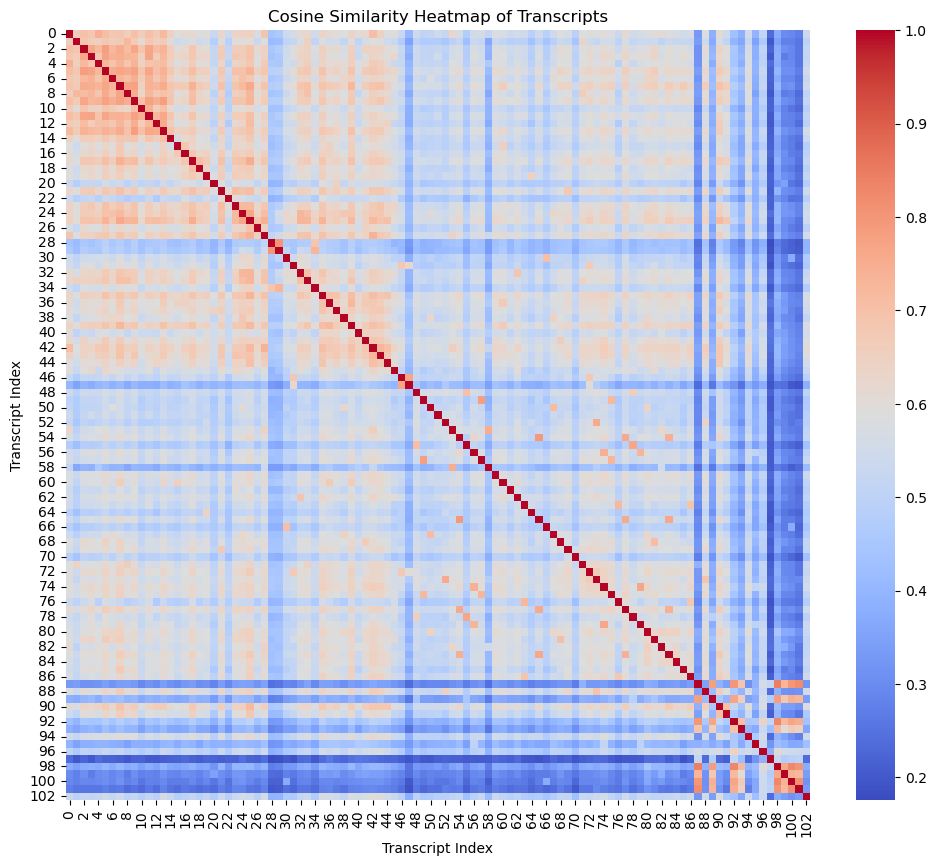

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your dataframe and 'Transcript' contains the text
texts = df['Transcript'].dropna().tolist()

# Step 1: Vectorize the transcripts using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(texts)

# Step 2: Compute pairwise cosine similarity
cosine_sim_matrix = cosine_similarity(tfidf_matrix)

# Step 3: Create a DataFrame for better visualization
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=df.index, columns=df.index)

# Step 4: Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cosine_sim_df, cmap="coolwarm", annot=False)
plt.title("Cosine Similarity Heatmap of Transcripts")
plt.xlabel("Transcript Index")
plt.ylabel("Transcript Index")
plt.show()


In [ ]:
import pandas as pd
import re

# Assuming 'df' is your DataFrame and 'Transcript' is the column with the text data
def extract_reactions(transcript):
    # Find all instances of crowd reactions and the preceding text
    matches = re.finditer(r"(.+?)\s*(\[[^\]]+\])", transcript)
    return [(match.group(1).strip(), match.group(2).strip()) for match in matches]

# Apply the extraction to each transcript
reaction_data = []
for transcript in df['Transcript']:
    reactions = extract_reactions(transcript)
    reaction_data.extend(reactions)

# Create a new DataFrame
reaction_df = pd.DataFrame(reaction_data, columns=['Preceding Phrase', 'Crowd Reaction'])

# Display the first few rows to verify
print(reaction_df.head())


                                    Preceding Phrase  \
0  Hello, everybody. Hello, Orlando. Hello, Sanfo...   
1  That's a lot of people. You know our competito...   
2  Thank you. Thank you. Thank you very much. Tha...   
3  Thank you, man. Thank you. This is the most im...   
4  He's got nothing going. If he wins, the radica...   

                    Crowd Reaction  
0          [Audience chants "USA"]  
1  [Audience chants "We love you"]  
2          [Audience chants "USA"]  
3                  [Audience Boos]  
4                      [Inaudible]  


In [ ]:
reaction_df.shape

(2723, 2)

In [ ]:
import pandas as pd
from nltk.corpus import sentiwordnet as swn
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
import nltk

# Download necessary resources
nltk.download('sentiwordnet')
nltk.download('wordnet')
nltk.download('punkt')

# Function to get the WordNet POS tag
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# Function to calculate sentiment score using SentiWordNet
def analyze_sentiment_swn(crowd_reaction):
    tokens = word_tokenize(crowd_reaction)
    sentiment_score = 0
    count = 0

    for token in tokens:
        synsets = list(swn.senti_synsets(token))
        if synsets:
            # Use the first synset's sentiment scores
            synset = synsets[0]
            sentiment_score += synset.pos_score() - synset.neg_score()
            count += 1

    # Average sentiment score
    if count == 0:
        return None
    avg_score = sentiment_score / count

    # Assign sentiment label: 1 for positive, 0 for negative, drop neutral
    if avg_score > 0:
        return 1
    elif avg_score < 0:
        return 0
    else:
        return None

# Apply sentiment analysis to the 'Crowd Reaction' column
sentiment_reaction_df = reaction_df.copy()  # Copy the original DataFrame
sentiment_reaction_df['Sentiment Label'] = sentiment_reaction_df['Crowd Reaction'].apply(analyze_sentiment_swn)

# Drop rows with neutral reactions
sentiment_reaction_df = sentiment_reaction_df.dropna(subset=['Sentiment Label'])

# Convert to integer for consistency
sentiment_reaction_df['Sentiment Label'] = sentiment_reaction_df['Sentiment Label'].astype(int)

# Display the updated DataFrame
print(sentiment_reaction_df.head())


[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\Gilles\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gilles\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gilles\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                    Preceding Phrase  \
1  That's a lot of people. You know our competito...   
3  Thank you, man. Thank you. This is the most im...   
4  He's got nothing going. If he wins, the radica...   
5  . And if I don't always play by the rules of W...   
6  How about where he gets caught again? He said,...   

                    Crowd Reaction  Sentiment Label  
1  [Audience chants "We love you"]                1  
3                  [Audience Boos]                0  
4                      [Inaudible]                0  
5                  [Audience Boos]                0  
6                  [Audience Boos]                0  


In [ ]:
sentiment_reaction_df.shape

(1790, 3)

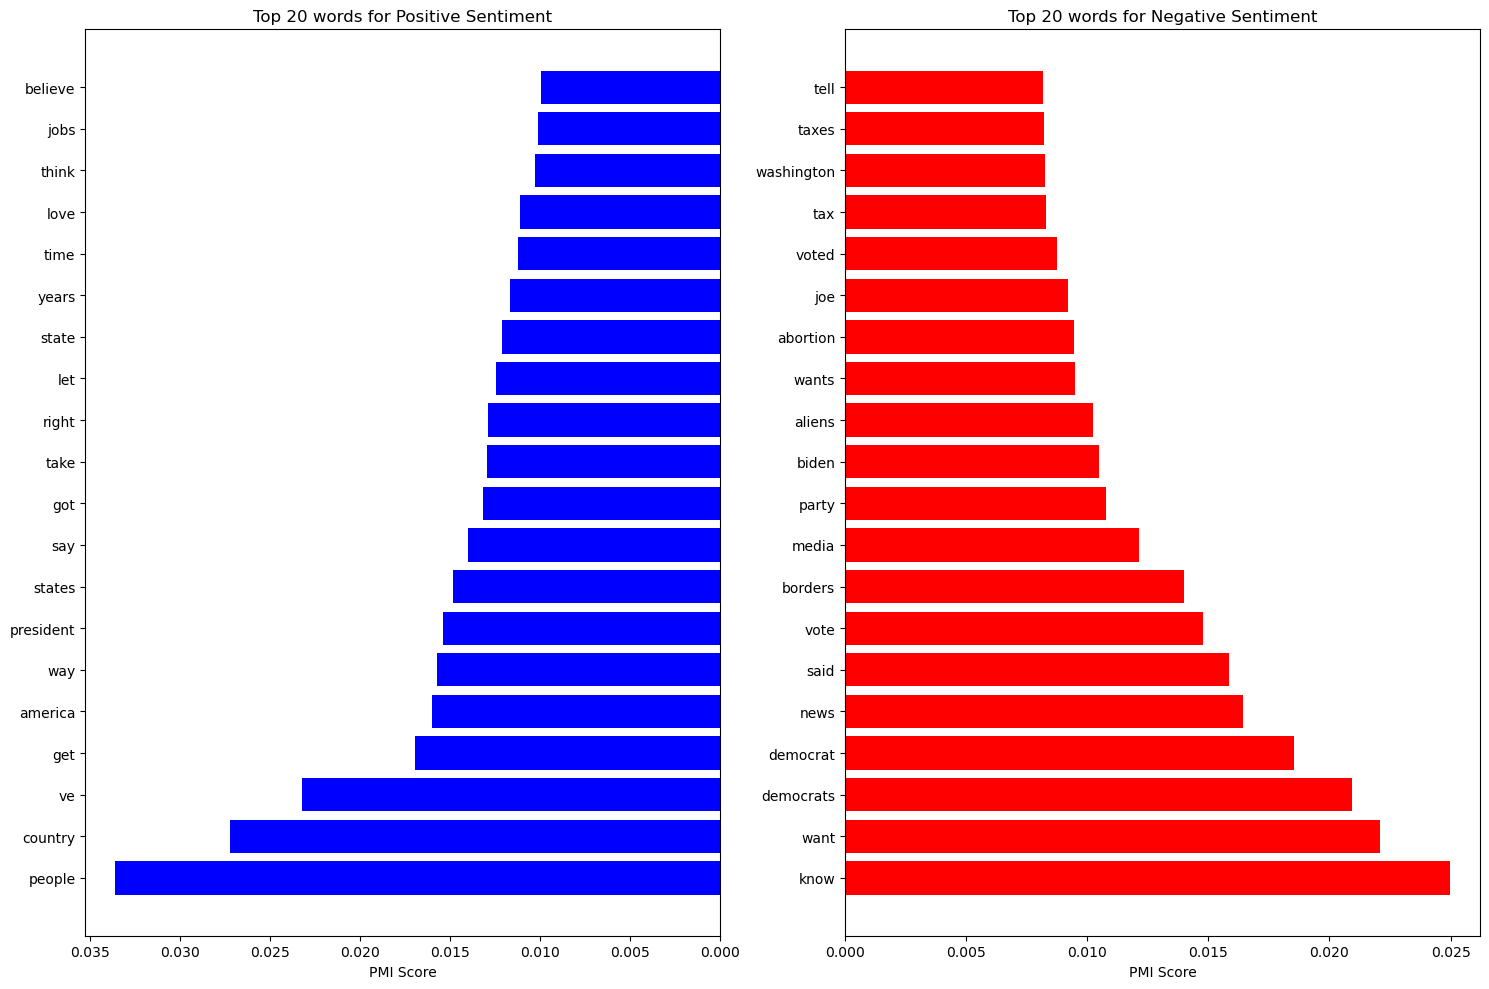

In [ ]:
import pandas as pd
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# Load the dataset
df1 = pd.read_excel(r'C:\Users\Gilles\Desktop\montr here I come\Previous ML and text mining projects winter 2024\NLP projects\filtered_phrases_nouns_verbs.xlsx')

# Fill NaN values in the 'Filtered_phrase' column with an empty string
df1['Filtered_phrase'].fillna('', inplace=True)

# Vectorize the 'Filtered_phrase' column
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features to suit your needs
X = vectorizer.fit_transform(df1['Filtered_phrase'])

# Get the sentiment labels
y = df1['label']

# Calculate mutual information for the features
mi_scores = mutual_info_classif(X, y)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Pair feature names with scores and filter by class
positive_features = [(name, score) for name, score in zip(feature_names, mi_scores) if df1[df1['Filtered_phrase'].str.contains(name)]['label'].mean() > 0.5]
negative_features = [(name, score) for name, score in zip(feature_names, mi_scores) if df1[df1['Filtered_phrase'].str.contains(name)]['label'].mean() < 0.5]

# Sort the features by score for each sentiment
top_positive_features = sorted(positive_features, key=lambda x: x[1], reverse=True)[:20]
top_negative_features = sorted(negative_features, key=lambda x: x[1], reverse=True)[:20]

# Extracting the features and their scores
positive_words, positive_scores = zip(*top_positive_features)
negative_words, negative_scores = zip(*top_negative_features)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# Plotting the positive sentiment words
axes[0].barh(positive_words, positive_scores, color='blue')
axes[0].set_title('Top 20 words for Positive Sentiment')
axes[0].invert_xaxis()  # labels read top-to-bottom
axes[0].set_xlabel('PMI Score')

# Plotting the negative sentiment words
axes[1].barh(negative_words, negative_scores, color='red')
axes[1].set_title('Top 20 words for Negative Sentiment')
axes[1].set_xlabel('PMI Score')

plt.tight_layout()
plt.show()


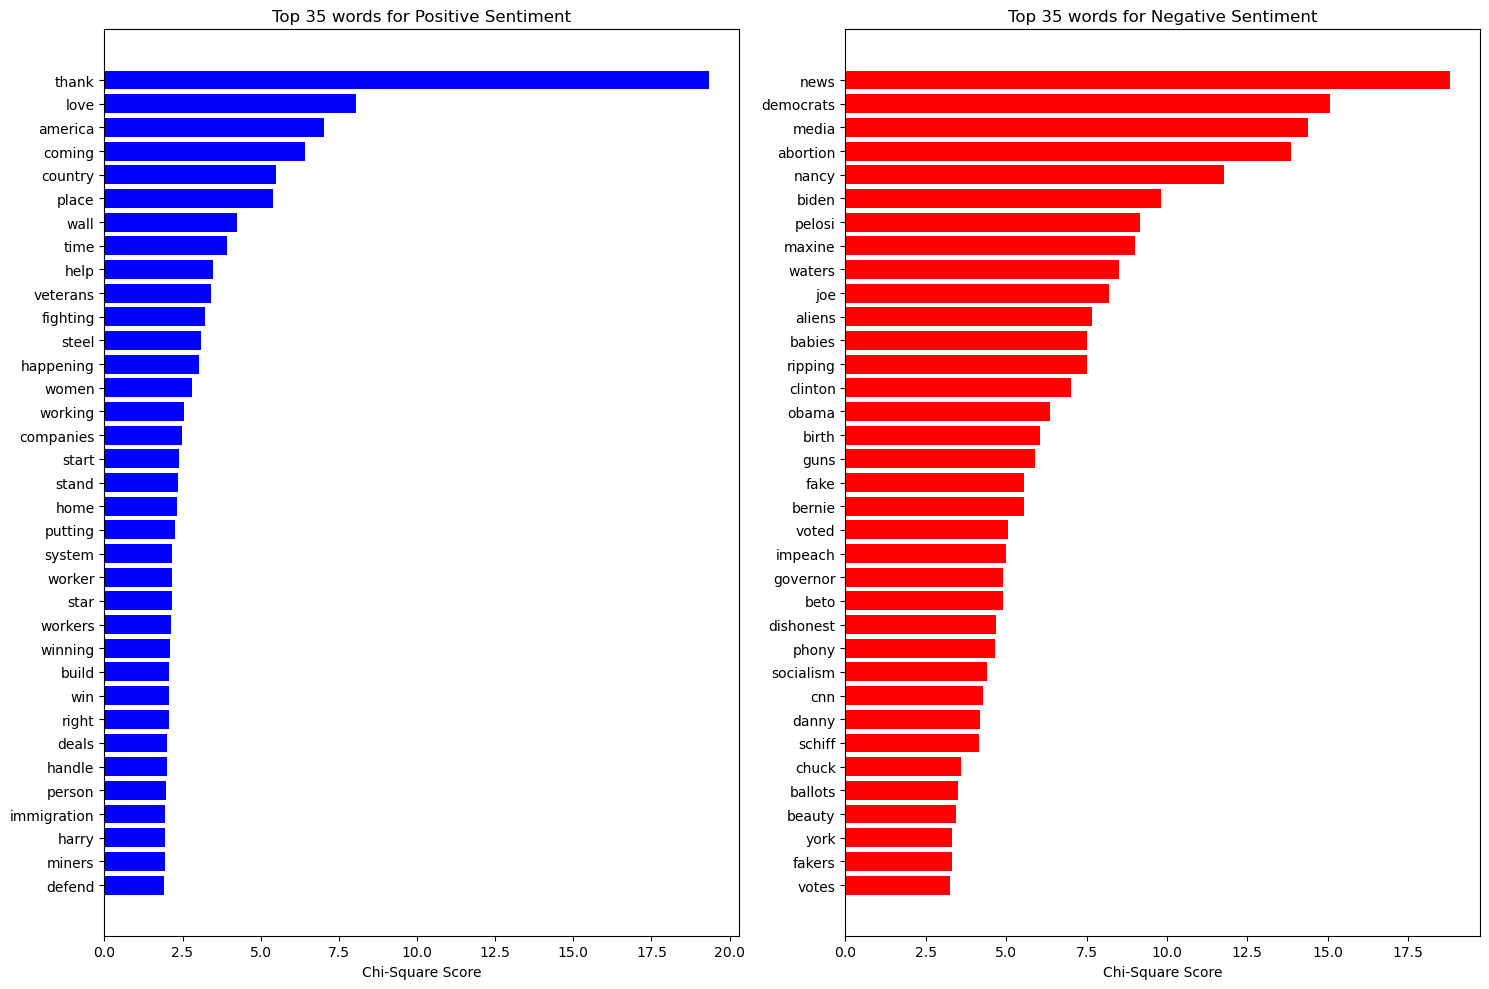

In [ ]:
# Define the stopwords that you want to remove
stopwords = {'know', 'want', 'wants', 'supports', 'crooked', 'party', 'straight', 'saw', 'moment',
             'left', 'guys', 'happened', 'idea', 'leader', 'lou', 'lies', 'gets', 'democrat',
             'trying', 'made', 'keep', 'need', 'telling', 'call', 'shut'}

# Function to remove stopwords from a phrase
def remove_stopwords(phrase):
    return ' '.join(word for word in phrase.split() if word not in stopwords)

# Fill NaN values in the 'Filtered_phrase' column with an empty string
df1['Filtered_phrase'].fillna('', inplace=True)
df1['Filtered_phrase'] = df1['Filtered_phrase'].apply(remove_stopwords)

# Vectorize the 'Filtered_phrase' column
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features to suit your needs
X = vectorizer.fit_transform(df1['Filtered_phrase'])

# Get the sentiment labels
y = df1['label']

# Apply Chi-Square test
chi2_scores, p_values = chi2(X, y)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Function to get the mean label for a given word
def mean_label(word):
    mask = df1['Filtered_phrase'].str.contains(word, na=False)
    return df1.loc[mask, 'label'].mean()

# Pair feature names with chi2 scores and filter by class
positive_features = [(name, score) for name, score in zip(feature_names, chi2_scores) if mean_label(name) > 0.5]
negative_features = [(name, score) for name, score in zip(feature_names, chi2_scores) if mean_label(name) < 0.5]

# Sort the features by chi2 score for each sentiment
top_positive_features = sorted(positive_features, key=lambda x: x[1], reverse=True)[:35]
top_negative_features = sorted(negative_features, key=lambda x: x[1], reverse=True)[:35]

# Extracting the features and their scores
positive_words, positive_scores = zip(*top_positive_features)
negative_words, negative_scores = zip(*top_negative_features)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# Plotting the positive sentiment words
axes[0].barh(positive_words, positive_scores, color='blue')
axes[0].set_title('Top 35 words for Positive Sentiment')
axes[0].invert_yaxis()  # Labels read top-to-bottom
axes[0].set_xlabel('Chi-Square Score')

# Plotting the negative sentiment words
axes[1].barh(negative_words, negative_scores, color='red')
axes[1].set_title('Top 35 words for Negative Sentiment')
axes[1].invert_yaxis()  # Labels read top-to-bottom
axes[1].set_xlabel('Chi-Square Score')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import re

# Define a function to extract sentences containing keywords
def extract_sentences_about_biden(transcript):
    # Split the transcript into sentences using a regex
    sentences = re.split(r'(?<=[.!?]) +', transcript)
    # Filter sentences containing "joe", "biden", or "joe biden" (case-insensitive)
    biden_sentences = [sentence for sentence in sentences if re.search(r'\b(joe|biden|joe biden)\b', sentence, re.IGNORECASE)]
    return biden_sentences

# Apply the function to each transcript and aggregate all sentences
all_biden_sentences = []
for transcript in df['Transcript']:
    if pd.notna(transcript):  # Check if transcript is not NaN
        all_biden_sentences.extend(extract_sentences_about_biden(transcript))

# Aggregate all sentences into a single string (optional)
aggregated_biden_sentences = " ".join(all_biden_sentences)

# Display the first few sentences as a preview
print("\n".join(all_biden_sentences[:10]))  # Preview the first 10 sentences


You know our competitor, sleepy Joe, he had a rally today and practically nobody showed up.
Sleepy Joe, but it's great to be back in my home state, Florida to make my official return to the campaign trail.
Sleepy Joe Biden, not a nice guy, by the way, I have to be honest.
No, Biden had a bad day.
Now Biden had a bad day.
Joe Biden is also owned by the radical globalists, the wealthy donors, the big money special interests who shipped away your jobs, shut down your factories, threw open your borders, and ravaged your cities while sacrificing American blood and treasure in this ridiculous -- endless wars, set of endless wars that we've been in for a long time, 19 years.
Biden has made a corrupt bargain exchange for his party's nomination, he's handed control to the Socialists, the Marxists, and the left-wing extremists and you know that and he's got no strength left, he's got no power left.
Sleepy Joe wants to quadruple your taxes, you know, wants to quadruple.
And by the way, Obama and 

In [ ]:
print(len(all_biden_sentences))  # Prints the number of sentences in the list


880


In [ ]:

from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import pandas as pd

# Assuming `all_biden_sentences` contains the extracted sentences
biden_sentences = all_biden_sentences  # List of sentences mentioning "Joe Biden"

# Load a pretrained transformer model from Sentence Transformers
embedding_model = SentenceTransformer('all-mpnet-base-v2')


# Initialize BERTopic with the pretrained embedding model
topic_model = BERTopic(embedding_model=embedding_model, language="english")

# Fit the BERTopic model
topics, probs = topic_model.fit_transform(biden_sentences)

# Get the topic information
topic_info = topic_model.get_topic_info()
print("Topic Information:\n", topic_info)

# Get detailed information about the top N topics
for i in range(5):  # Adjust range to see more topics
    print(f"\nTopic {i}:\n", topic_model.get_topic(i))

# Visualize the topics
topic_model.visualize_topics()


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Topic Information:
     Topic  Count                               Name  \
0      -1    188                -1_biden_he_the_and   
1       0    117                   0_joe_vote_to_go   
2       1    102              1_sleepy_joe_that_you   
3       2     87            2_to_destroy_biden_plan   
4       3     83                3_the_left_biden_of   
5       4     55              4_jobs_your_biden_the   
6       5     40             5_china_wins_biden_and   
7       6     26                 6_47_years_last_ve   
8       7     26            7_sleepy_joe_biden_they   
9       8     25  8_donnelly_effective_voted_senate   
10      9     22   9_opposed_school_charter_schools   
11     10     21             10_know_biden_you_didn   
12     11     21          11_ukraine_son_was_hunter   
13     12     20          12_vaccine_flu_h1n1_swine   
14     13     17   13_manchin_west_virginia_liberal   
15     14     16         14_biden_smart_wasn_people   
16     15     14            15_weak_country_i

In [ ]:
# Visualize the top 10 words for each topic using BERTopic's built-in method
topic_model.visualize_barchart(top_n_topics=20, n_words=10)


In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import spacy

# Assuming `all_biden_sentences` contains the extracted sentences
biden_sentences = all_biden_sentences  # List of sentences mentioning "Joe Biden"

# Step 1: Define custom stop words
custom_stopwords = {
    "said", "think", "got", "let", "like", "did", "going", "remember", "know",
    "compared", "months", "day", "thing", "people", "bad", "right", "can", "joe", "biden","had","now","say","go","gon","just","have","here","so","do","get","as"
,"need","done","then"}

# Load SpaCy's English model
nlp = spacy.load("en_core_web_sm")

# Step 2: Preprocess sentences by removing stop words and grammar words
def preprocess_sentences(sentences):
    processed_sentences = []
    for sentence in sentences:
        doc = nlp(sentence)
        filtered_words = [
            token.text for token in doc
            if token.is_alpha  # Only keep alphabetic tokens
            and token.text.lower() not in custom_stopwords  # Exclude custom stop words
            and token.pos_ not in {"AUX", "CCONJ", "DET", "PRON"}  # Exclude grammar words
            and token.pos_ in {"NOUN", "VERB", "ADJ", "ADV"}  # Keep meaningful POS
        ]
        processed_sentences.append(" ".join(filtered_words))
    return processed_sentences

# Apply preprocessing
cleaned_biden_sentences = preprocess_sentences(biden_sentences)

# Step 3: Load the pretrained transformer model
embedding_model = SentenceTransformer('all-mpnet-base-v2')

# Step 4: Initialize BERTopic with the pretrained embedding model
topic_model = BERTopic(embedding_model=embedding_model, language="english")

# Step 5: Fit the BERTopic model
topics, probs = topic_model.fit_transform(cleaned_biden_sentences)

# Step 6: Get the topic information
topic_info = topic_model.get_topic_info()
print("Topic Information:\n", topic_info)

# Step 7: Get detailed information about the top N topics
for i in range(5):  # Adjust range to see more topics
    print(f"\nTopic {i}:\n", topic_model.get_topic(i))



Topic Information:
     Topic  Count                               Name  \
0      -1    142  -1_destroy_opposed_charter_school   
1       0    138               0_son_take_tell_good   
2       1    116      1_left_police_radical_rioters   
3       2    101            2_tax_ban_wants_vaccine   
4       3     82       3_sleepy_endorsed_guy_better   
5       4     78     4_jobs_supported_coal_american   
6       5     48                              5____   
7       6     38      6_years_last_damage_reversing   
8       7     31             7_vote_voted_war_votes   
9       8     23        8_call_percent_fairness_ran   
10      9     19      9_country_lead_chairman_party   
11     10     19            10_wins_simple_mob_very   
12     11     17    11_slow_circles_little_smoother   
13     12     15        12_agenda_made_list_seniors   
14     13     13  13_debate_night_nomination_single   

                                       Representation  \
0   [destroy, opposed, charter, school, pu

In [ ]:
# Visualize the topics with more words (e.g., top 10 words per topic)
topic_model.visualize_barchart(top_n_topics=20, n_words=10)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import pandas as pd

# Assuming `processed_biden_sentences` contains the preprocessed sentences
# Example: processed_biden_sentences = ["biden economy plan", "joe vaccine rollout", ...]

# Step 1: Convert sentences into a TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')  # Adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_biden_sentences)

# Step 2: Apply NMF for topic modeling
n_topics = 5  # Number of topics
nmf_model = NMF(n_components=n_topics, random_state=42)
W = nmf_model.fit_transform(tfidf_matrix)  # Document-topic matrix
H = nmf_model.components_  # Topic-word matrix

# Step 3: Extract the top words for each topic
feature_names = tfidf_vectorizer.get_feature_names_out()

def display_topics(H, feature_names, n_top_words):
    for topic_idx, topic in enumerate(H):
        print(f"Topic {topic_idx}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Display top 10 words for each topic
display_topics(H, feature_names, n_top_words=10)

Topic 0:
sleepy, slow, guy, beat, better, endorsed, debate, stage, look, rally
Topic 1:
vote, votes, opponent, lot, state, way, charge, asking, problem, forgiveness
Topic 2:
wins, mob, simple, anarchists, win, rioters, arsonists, flag, burners, look
Topic 3:
years, spent, damage, reversing, inflicted, horrible, period, year, country, true
Topic 4:
voted, tax, cuts, left, war, destroy, radical, american, agenda, ban
